# **PHASE 3 PROJECT** 


### **Final Project Submission**
Please fill out:

Student name: Alex Irungu

Group: GROUP 1

Student pace: PART TIME 

Scheduled project review date/time: PHASE 3

Instructor name: SAMUEL KARU

## 1. Business Problem and Stakeholder

Our stakeholder is the city police department leadership. They want to understand what factors contribute to arrests following Terry Stops, with the goal of improving police practices and community relations

We aim to build a classifier to predict whether an arrest was made after a Terry Stop, using various features including time of day, presence of weapons, and potentially sensitive information like race and gender.

## 2. Data Loading and Exploration

In [7]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer


In [8]:
# Load the data
df = pd.read_csv('Terry_Stops_20240827.csv')

In [9]:
# Display first few rows and basic information about the dataset
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,7732696346,20190000315233,9803669705,Field Contact,-,4161,1957,M,American Indian/Alaska Native,...,10:47:39.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KING - PLATOON 1,N,N,West,K,K2
1,46 - 55,8295859194,20190000207006,8299762394,Arrest,-,6404,1971,M,White,...,17:08:12.0000000,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),911,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,Y,N,North,N,N3
2,26 - 35,-1,20170000002886,467843,Field Contact,NaN,7430,1984,F,White,...,17:48:00.0000000,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,Y,-,-,-
3,1 - 17,-1,20180000275743,472723,Offense Report,NaN,5151,1962,M,White,...,11:49:00.0000000,-,-,-,SOUTHWEST PCT 1ST W - WILLIAM - PLATOON 2,N,N,Southwest,F,F1
4,36 - 45,16227498273,20220000263279,37099192062,Arrest,-,7655,1982,M,Nat Hawaiian/Oth Pac Islander,...,22:18:36.0000000,SHOPLIFT - THEFT,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,ONVIEW,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,Southwest,F,F2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61021 entries, 0 to 61020
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61021 non-null  object
 1   Subject ID                61021 non-null  int64 
 2   GO / SC Num               61021 non-null  int64 
 3   Terry Stop ID             61021 non-null  int64 
 4   Stop Resolution           61021 non-null  object
 5   Weapon Type               28456 non-null  object
 6   Officer ID                61021 non-null  object
 7   Officer YOB               61021 non-null  int64 
 8   Officer Gender            61021 non-null  object
 9   Officer Race              61021 non-null  object
 10  Subject Perceived Race    61021 non-null  object
 11  Subject Perceived Gender  61021 non-null  object
 12  Reported Date             61021 non-null  object
 13  Reported Time             61021 non-null  object
 14  Initial Call Type     

## Data Exploration

In [11]:
# check the distribution of the target variable (Arrest Flag)
print(df['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
N    0.892086
Y    0.107914
Name: proportion, dtype: float64


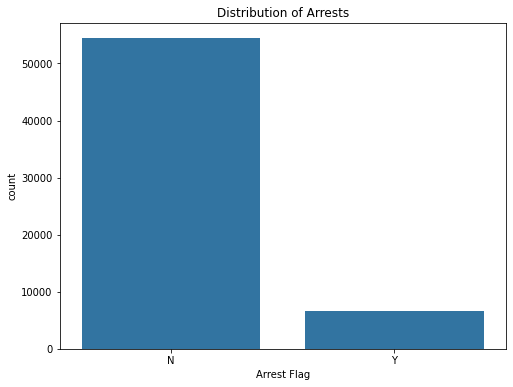

In [12]:
# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Arrest Flag', data=df)
plt.title('Distribution of Arrests')
plt.show()

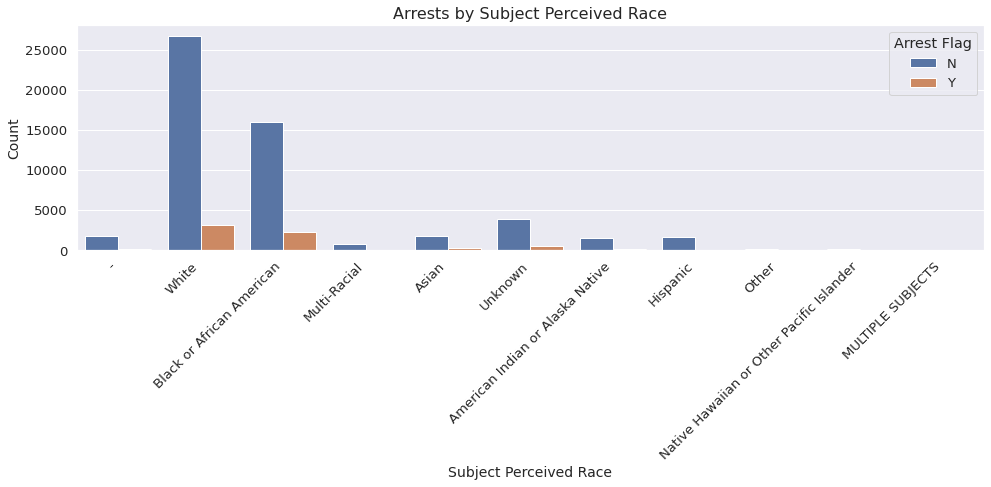

In [15]:
# Examine the relationship between subject perceived race and arrest flag
# Adjust the plot size and font size
plt.figure(figsize=(14, 7))
sns.set(font_scale=1.2)

# Create the countplot with improved aesthetics
sns.countplot(x='Subject Perceived Race', hue='Arrest Flag', data=df, palette='deep')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels with improved font size
plt.title('Arrests by Subject Perceived Race', fontsize=16)
plt.xlabel('Subject Perceived Race', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Move the legend to a more suitable position
plt.legend(title='Arrest Flag', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

## 3. Data Preprocessing and Feature Engineering

In [16]:
# Handle missing values
df['Weapon Type'].fillna('None', inplace=True)
df['Officer Squad'].fillna('Unknown', inplace=True)

In [17]:
# Convert Reported Date and Time to datetine
df['Reported DateTime'] = pd.to_datetime(df['Reported Date'] + ' ' + df['Reported Time'])

<ipython-input-17-89928473042f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reported DateTime'] = pd.to_datetime(df['Reported Date'] + ' ' + df['Reported Time'])


In [18]:
# Extract Hour from Reported DateTime
df['Reported Hour'] = df['Reported DateTime'].dt.hour

In [20]:
# Encode categorical values
categorical_columns = ['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Gender', 'Officer Race',
                       'Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type',
                       'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat']

df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,Subject ID,GO / SC Num,Terry Stop ID,Officer ID,Officer YOB,Reported Date,Reported Time,Arrest Flag,Frisk Flag,Reported DateTime,...,Beat_S,Beat_S1,Beat_S2,Beat_S3,Beat_U1,Beat_U2,Beat_U3,Beat_W1,Beat_W2,Beat_W3
0,7732696346,20190000315233,9803669705,4161,1957,2019-08-24T00:00:00Z,10:47:39.0000000,N,N,2019-08-24 10:47:39+00:00,...,False,False,False,False,False,False,False,False,False,False
1,8295859194,20190000207006,8299762394,6404,1971,2019-06-07T00:00:00Z,17:08:12.0000000,Y,N,2019-06-07 17:08:12+00:00,...,False,False,False,False,False,False,False,False,False,False
2,-1,20170000002886,467843,7430,1984,2017-07-07T00:00:00Z,17:48:00.0000000,N,Y,2017-07-07 17:48:00+00:00,...,False,False,False,False,False,False,False,False,False,False
3,-1,20180000275743,472723,5151,1962,2018-08-20T00:00:00Z,11:49:00.0000000,N,N,2018-08-20 11:49:00+00:00,...,False,False,False,False,False,False,False,False,False,False
4,16227498273,20220000263279,37099192062,7655,1982,2022-10-01T00:00:00Z,22:18:36.0000000,Y,N,2022-10-01 22:18:36+00:00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61016,13110501478,20200000148555,13110485706,8509,1985,2020-05-05T00:00:00Z,11:27:07.0000000,N,Y,2020-05-05 11:27:07+00:00,...,False,False,False,False,False,False,False,False,False,False
61017,-1,20170000374161,316043,8517,1990,2017-10-08T00:00:00Z,07:55:00.0000000,N,N,2017-10-08 07:55:00+00:00,...,False,False,False,False,False,False,False,False,False,False
61018,-1,20180000344808,482029,8534,1991,2018-09-15T00:00:00Z,03:25:00.0000000,N,N,2018-09-15 03:25:00+00:00,...,False,False,False,False,False,False,False,False,False,False
61019,7757812732,20210000078110,22400564060,8584,1982,2021-04-01T00:00:00Z,04:24:16.0000000,N,N,2021-04-01 04:24:16+00:00,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Prepare features and target
X = df_encoded.drop(['Arrest Flag', 'Frisk Flag', 'Reported Date', 'Reported Time', 'Reported DateTime', 'GO / SC Num', 'Terry Stop ID'], axis=1)
y = (df_encoded['Arrest Flag'] == 'Y').astype(int)

In [23]:
# Split the data
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: '-'